# Feature Extract

In [1]:
import numpy as np
import pandas as pd
import torch.nn as nn
import webdataset as wds
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.models as models
import torchvision.transforms.functional as F

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from torchvision.models.feature_extraction import create_feature_extractor

In [2]:
sns.set_style("darkgrid")

## Setup

In [3]:
root = '.'
data_folder = f'{root}/data'

## Load Data

In [4]:
ds_train = (wds.WebDataset(f'file:{data_folder}/train-000000.tar', shardshuffle=False)
    .decode("pil")
    .to_tuple("jpg", "json"))

ds_val = (wds.WebDataset(f'file:{data_folder}/val-000000.tar', shardshuffle=False)
    .decode("pil")
    .to_tuple("jpg", "json"))

ds_test = (wds.WebDataset(f'file:{data_folder}/test-000000.tar', shardshuffle=False)
    .decode("pil")
    .to_tuple("jpg", "json"))

In [4]:
sample = next(iter(ds_train))

In [5]:
print(sample)

(<PIL.Image.Image image mode=RGB size=227x227 at 0x26AFCEB9100>, {'ttype': None, 'base': 'ESP_013049_0950_RED-0067.jpg', 'label': 7, 'image': 'ESP_013049_0950_RED-0067.jpg'})


In [6]:
image, meta = sample

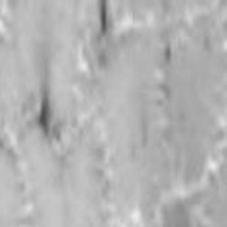

In [7]:
image

## Feature Extract

In [5]:
resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

In [9]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
feature_extractor = nn.Sequential(*list(resnet.children())[:-1])

In [11]:
print(feature_extractor)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [7]:
def transform(image):
    # image = F.resize(image, 256)
    # image = F.center_crop(image, 224)
    image = F.to_tensor(image)
    image = F.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return image

In [13]:
image = transform(image)

In [14]:
extracted = feature_extractor(image.unsqueeze(0))

In [15]:
features = extracted.squeeze(0).detach().numpy()

In [16]:
features.shape

(512, 1, 1)

In [17]:
features.reshape(-1)

array([0.938591  , 0.98160535, 0.81147254, 1.0399284 , 0.9175577 ,
       0.827355  , 0.8986529 , 1.1632441 , 0.96511215, 0.94739425,
       0.8546838 , 0.88505024, 0.9636835 , 0.89523137, 0.9527651 ,
       0.9640926 , 0.8979385 , 1.3555691 , 0.9698421 , 0.95813584,
       0.8940915 , 1.0280795 , 0.90907514, 1.0109276 , 0.8925253 ,
       0.97991574, 0.94444007, 0.9527832 , 0.8326195 , 0.912573  ,
       0.93441355, 0.86116743, 0.8960057 , 0.8637482 , 0.89495826,
       0.9255261 , 0.8985815 , 0.9512557 , 0.96221226, 0.8951369 ,
       0.86128026, 0.90348184, 0.86351836, 0.9242041 , 0.8774283 ,
       0.8940966 , 0.9196547 , 1.2148279 , 0.9690155 , 0.8635403 ,
       0.914188  , 0.9820709 , 0.9046987 , 0.917059  , 0.95333207,
       0.91527915, 1.0486892 , 0.9784473 , 0.9940295 , 0.9811542 ,
       0.83274543, 1.0194088 , 0.9361732 , 0.8985614 , 0.9228627 ,
       1.0187477 , 0.8659896 , 0.96466064, 1.0419135 , 0.84113425,
       0.8289575 , 0.78941447, 0.8945055 , 0.85175747, 0.89945

This represents the final set of inputs which has at this point been pooled lets visualize what the actual layers understand

## Visualize Features

In [47]:
def view_feature_map_sample(fmaps, n=9):
    plt.figure(figsize=(3, 3))

    choices = np.random.choice(len(fmaps), n)

    for i, choice in enumerate(choices):
        plt.subplot(3, 3, i+1)
        plt.imshow(fmaps[choice], cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

### Layer 1

In [34]:
layer1 = create_feature_extractor(resnet, return_nodes=['layer1'])

In [35]:
print(layer1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

Ensure proper capture of layer 1 and required precursor layers

In [43]:
fmaps = layer1(image.unsqueeze(0))['layer1'].squeeze(0).detach().numpy()
fmaps.shape

(64, 57, 57)

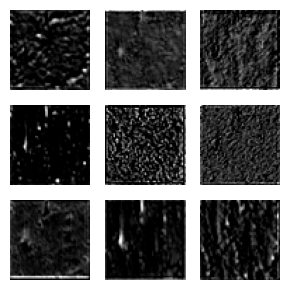

In [48]:
view_feature_map_sample(fmaps, n=9)

### Layer 2

In [49]:
layer2 = create_feature_extractor(resnet, return_nodes=['layer2'])

In [50]:
print(layer2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

Ensure the function grabs the layers on its way down to layer 2

In [53]:
fmaps = layer2(image.unsqueeze(0))['layer2'].squeeze(0).detach().numpy()
fmaps.shape

(128, 29, 29)

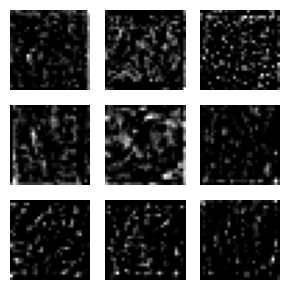

In [54]:
view_feature_map_sample(fmaps, n=9)

### Layer 3

In [55]:
layer3 = create_feature_extractor(resnet, return_nodes=['layer3'])

In [56]:
fmaps = layer3(image.unsqueeze(0))['layer3'].squeeze(0).detach().numpy()
fmaps.shape

(256, 15, 15)

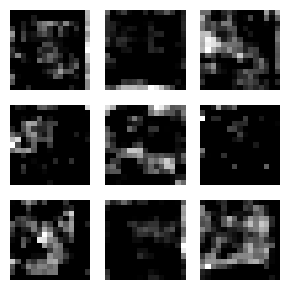

In [57]:
view_feature_map_sample(fmaps, n=9)

### Layer 4

In [58]:
layer4 = create_feature_extractor(resnet, return_nodes=['layer4'])

In [59]:
fmaps = layer4(image.unsqueeze(0))['layer4'].squeeze(0).detach().numpy()
fmaps.shape

(512, 8, 8)

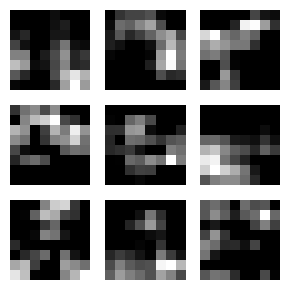

In [60]:
view_feature_map_sample(fmaps, n=9)

This lower level data L4 is what will then be pooled and given to the classification layer

## Feature Files

In [8]:
def get_fmaps(ds):
    fmaps = []
    labels = []

    for img, meta in iter(ds):
        image = transform(img)
        fmap = feature_extractor(image.unsqueeze(0)).flatten().detach().numpy()
        fmaps.append(fmap)
        labels.append(meta['label'])

    fmaps = np.array(fmaps)
    labels = np.array(labels)

    return fmaps, labels

In [9]:
fmaps, labels = get_fmaps(ds_val)
np.save(f'{data_folder}/val-fmaps.npy', fmaps)
np.save(f'{data_folder}/val-labels.npy', labels)

In [10]:
fmaps, labels = get_fmaps(ds_test)
np.save(f'{data_folder}/test-fmaps.npy', fmaps)
np.save(f'{data_folder}/test-labels.npy', labels)

In [ ]:
fmaps, labels = get_fmaps(ds_train)
np.save(f'{data_folder}/train-fmaps.npy', fmaps)
np.save(f'{data_folder}/train-labels.npy', labels)

## Clustering

In [37]:
print(fmaps.shape, labels.shape)

(8960, 512) (8960,)


### Reduce Feature Space

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fmaps)

In [35]:
pca = PCA()
pca.fit(X_scaled)

PCA()

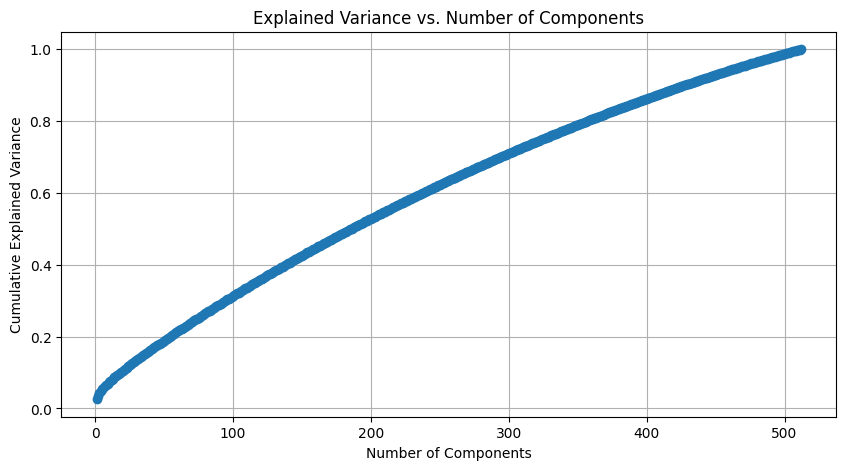

In [36]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [38]:
del pca

To reduce the space by way of PCA to a useful amount would require a loss in the variance

### View Clusters

In [40]:
tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(X_scaled)

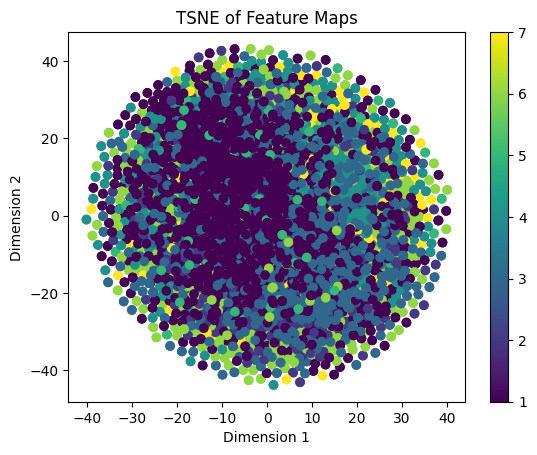

In [42]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('TSNE of Feature Maps')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()

### Predictive Power

In [ ]:
clf = LogisticRegression().fit(X_scaled, labels)

In [46]:
clf.score(X_scaled, labels)

0.7734375

A base linear regression is able to score ~77% which is not a bad for a start and shows promise for this as a feature

In [54]:
preds = clf.predict(X_scaled)
corr = preds == labels

In [60]:
df = pd.DataFrame({'correct': corr, 'label': labels})

In [61]:
df.head()

,correct,label
0,True,7
1,True,7
2,False,7
3,True,7
4,True,7


Text(0, 0.5, 'Count')

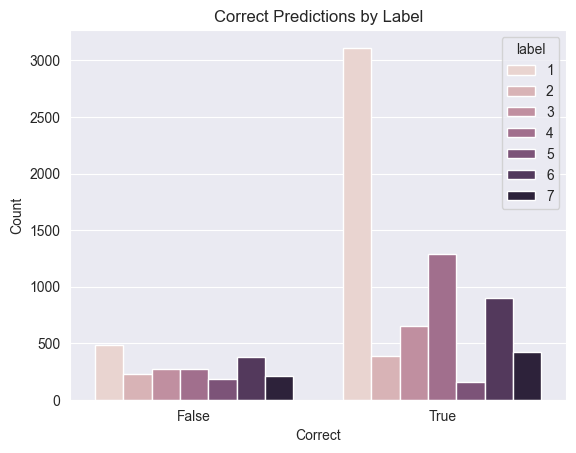

In [69]:
ax = sns.countplot(df, x='correct', hue='label')
ax.set_title('Correct Predictions by Label')
ax.set_xlabel('Correct')
ax.set_ylabel('Count')

## Cleanup

In [70]:
ds_train.close()